In [1]:
import urllib.request
from pprint import pprint
from html_table_parser.parser import HTMLTableParser
import pandas as pd

In [2]:
def url_get_contents(url):
    #making request to the website
    req = urllib.request.Request(url=url,headers={"User-Agent": "Mozilla/5.0"})
    f = urllib.request.urlopen(req)
    #reading contents of the website
    return f.read()

In [88]:
# defining the html contents of a URL.
xhtml = url_get_contents('https://www.visualcapitalist.com/20-years-nintendo-console-switch-sales/').decode('utf-8')
 
# Defining the HTMLTableParser object
p = HTMLTableParser()
 
# feeding the html contents in the HTMLTableParser object
p.feed(xhtml)

pprint(p.tables[0])
 
#print("\n\nPANDAS DATAFRAME\n")
# turn into df and set headers
df = pd.DataFrame(p.tables[0])
df = df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)
# convert string to int
df['Release Year'] = df['Release Year'].astype('int')
df['Units Sold (as of Sept 30, 2020)'] = df['Units Sold (as of Sept 30, 2020)'].replace({'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['Console and Release Yr'] = df['Console'] + " - " + df['Release Year'].astype('str')
print(df.dtypes)
print(df)

[['Console', 'Release Year', 'Units Sold (as of Sept 30, 2020)'],
 ['NES', '1983', '61.91 M'],
 ['Game Boy', '1989', '118.69 M'],
 ['SNES', '1990', '49.1 M'],
 ['Nintendo 64', '1996', '32.93 M'],
 ['Game Boy Advance', '2001', '81.51 M'],
 ['Nintendo GameCube', '2001', '21.74 M'],
 ['Nintendo DS', '2004', '154.02 M'],
 ['Nintendo Wii', '2006', '101.63 M'],
 ['Nintendo 3DS', '2011', '75.94 M'],
 ['Wii U', '2012', '13.56 M'],
 ['Nintendo Switch', '2017', '68.3 M']]
Console                             object
Release Year                         int32
Units Sold (as of Sept 30, 2020)     int32
Console and Release Yr              object
dtype: object
              Console  Release Year  Units Sold (as of Sept 30, 2020)  \
0                 NES          1983                          61910000   
1            Game Boy          1989                         118690000   
2                SNES          1990                          49100000   
3         Nintendo 64          1996                    

In [10]:
# Do imports and make sure font is available... wasn't able to use in Plotly
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager.findfont("Pretendo")

'C:\\Users\\nickp\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendo.ttf'

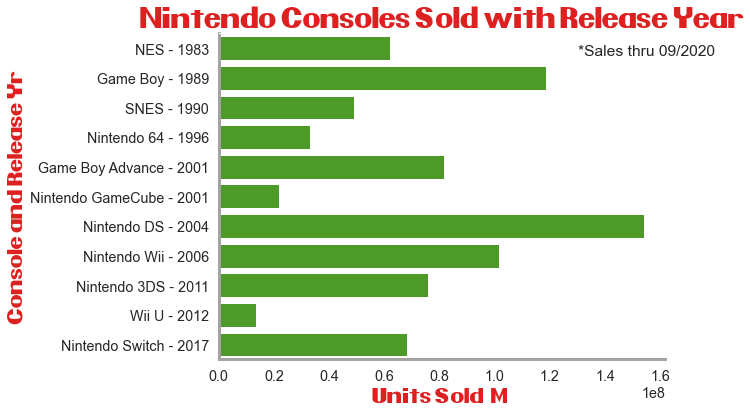

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font='Arial',font_scale=1.3)
sns.set_style(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
chart = sns.barplot(x = 'Units Sold (as of Sept 30, 2020)',
            y = 'Console and Release Yr',
            ci=None,
            color='#48ad16',
            data = df)
chart.set_title('Nintendo Consoles Sold with Release Year',fontdict={'family':'Pretendo','size':26,'color':'#dd2020'})
chart.set_xlabel('Units Sold (M)', fontdict={'family':'Pretendo','size':20,'color':'#dd2020'})
chart.set_ylabel('Console and Release Yr', fontdict={'family':'Pretendo','size':20,'color':'#dd2020'})
ax = chart
ax.text(130000000,0.25, "*Sales thru 09/2020")
ax.spines['left'].set_linewidth(3)
ax.spines['left'].set_color('#a5a2a2')
ax.spines['bottom'].set_linewidth(3)
ax.spines['bottom'].set_color('#a5a2a2')
# Show the plot
plt.show()